(150, 4)


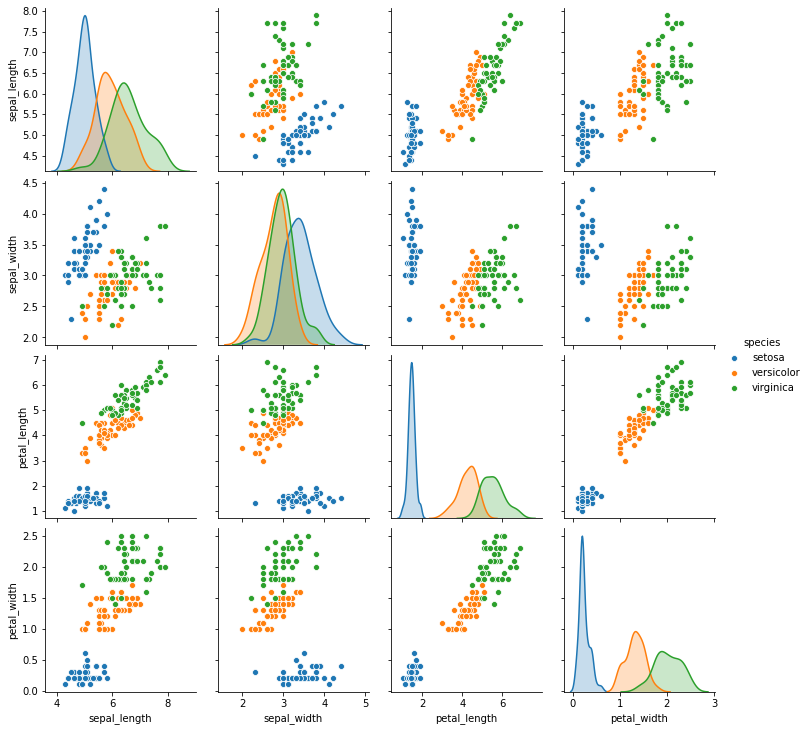

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import seaborn as sb

iris = pd.read_csv('../iris.cvs')
sb.pairplot(iris, hue = 'species') 
iris_data = iris.drop(['species'], axis=1, inplace = False)
data = iris_data.values
print(data.shape)

## Parte A: PCA e redução de dimensionalidade

Matriz de covariância K:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]

(4, 150)


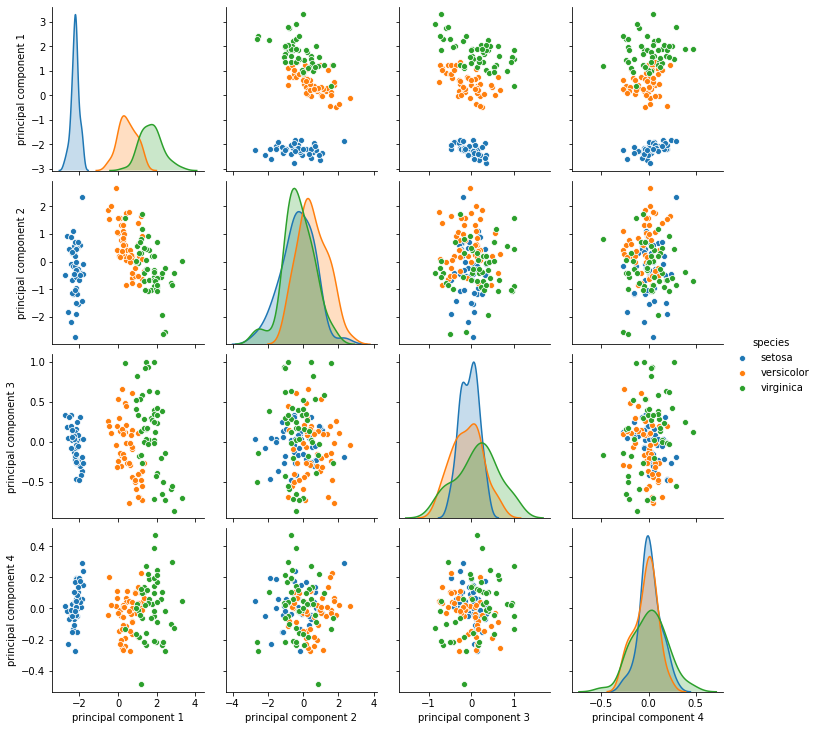

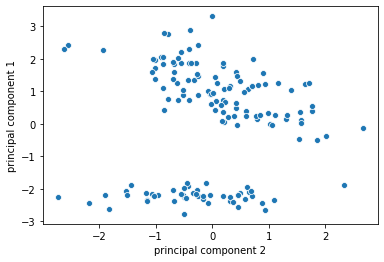

In [96]:
#Normalização dos dados
x = StandardScaler().fit_transform(data)

K = np.cov(x.T)
print("Matriz de covariância K:\n %s\n"%K)
eigenvalues, eigenvectors = np.linalg.eig(K)

#sorting the values decreasing order
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Changing to the new base
principal_comp = []
for eigenvectorT in (eigenvectors.T):
    principal_comp.append(x.dot(eigenvectorT))
    
principal_comp = np.array(principal_comp)
print(principal_comp.shape)
Data = pd.DataFrame(data = principal_comp.T, columns=['principal component 1', 'principal component 2', 'principal component 3','principal component 4'])
Data = pd.concat([Data, iris['species']], axis = 1)

sb.pairplot(Data, hue = 'species')

plt.show()
Data_2D = pd.DataFrame(data = principal_comp[:2].T, columns=['principal component 1', 'principal component 2'])
Data_2D = pd.concat([Data, iris['species']], axis = 1)
# sb.pairplot(Data_2D, hue = 'species')
sb.scatterplot(Data_2D['principal component 2'],Data_2D['principal component 1'])
plt.show()

#É equivalente ao método do sklearn? R: SIM
# from sklearn.decomposition import PCA
# pca = PCA(n_components=4)
# principalComponents = pca.fit_transform(x).T
# print(principalComponents.shape)
# Data1 = pd.DataFrame(data = principalComponents.T, columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4'])
# Data1 = pd.concat([Data1, iris['species']], axis = 1)
# sb.pairplot(Data1, hue='species')

# Esse é top : https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

## Parte A: OK

In [5]:
df = pd.read_csv("iris.data", names=['sepal length','sepal width','petal length','petal width','target'])

(150, 4)
(150, 2)


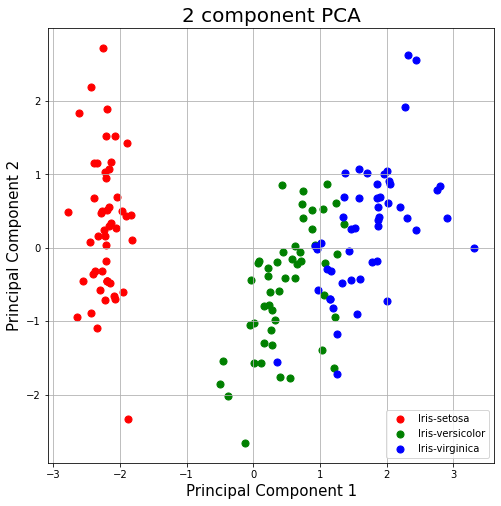

In [13]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']# Separating out the features
x = df.loc[:, features].values# Separating out the target
y = df.loc[:,['target']].values# Standardizing the features
# print(np.max(x))
# print(np.min(x))
# print()
x = StandardScaler().fit_transform(x)
# print(np.max(x))
# print(np.min(x))
print(x.shape)

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
print(principalComponents.shape)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
sb.pairplot(finalDf, hue='species')

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

## Parte B: